# For shopify intern challenge

### **Question 1: Given some sample data, write a program to answer the following: click here to access the required data set**


On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Explore the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Copy of 2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
# check the data on hand
df.head(2)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52


In [4]:
# adding new column to see how much it cost for one pair of sneaker in each shop
df['one_pair'] = df.order_amount / df.total_items

In [5]:
# check descriptive informaiton for the dataset
df.describe()

,order_id,shop_id,user_id,order_amount,total_items,one_pair
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


* Based on the above descriptive information, we can see **order_amount**,  **total_items**, and new column **one_pair** should have extreme values as outliers.

In [6]:
# check which shop would be the outlier.
df.groupby('shop_id')[['order_amount','total_items','one_pair']].mean().\
sort_values(ascending=[False,False], by=['order_amount','total_items'])

,order_amount,total_items,one_pair
shop_id,,,
42,235101.490196,667.901961,352.0
78,49213.043478,1.913043,25725.0
50,403.545455,2.090909,193.0
90,403.224490,2.265306,178.0
38,390.857143,2.057143,190.0
...,...,...,...
53,214.117647,1.911765,112.0
100,213.675000,1.925000,111.0
32,189.976190,1.880952,101.0


* according to above groupby result, shop_id 78 has one_pair price much more expensive than others, and average item amount of each order from shop_id 42 is also much higher than others. These should be the outliers.

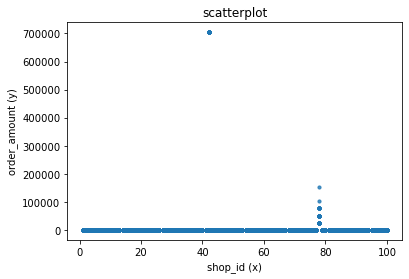

In [7]:
# visualized the dataset, shop_id 78 and shop_id 42 are indeed much higher than others
plt.scatter(df[['shop_id']], df.order_amount, marker= 'o', s=10, alpha=0.8)
plt.title('scatterplot')
plt.xlabel('shop_id (x)')
plt.ylabel('order_amount (y)')
plt.show()

* To see how dataset perform without the outliers

In [8]:
# create a new dataset without outlier
df2 = df[(df.shop_id != 42) & (df.shop_id !=78)].copy()

In [9]:
# check information of new dataset. Now it looks better, mean and median is closer, and std is much smaller than before.
df2.describe()

,order_id,shop_id,user_id,order_amount,total_items,one_pair
count,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,2499.584540,49.900877,849.858862,300.155823,1.995717,150.400163
std,1444.221163,29.154367,86.887947,155.941112,0.982602,23.851202
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1246.500000,24.000000,776.000000,163.000000,1.000000,132.000000
50%,2499.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3750.500000,74.000000,925.000000,386.500000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000,201.000000


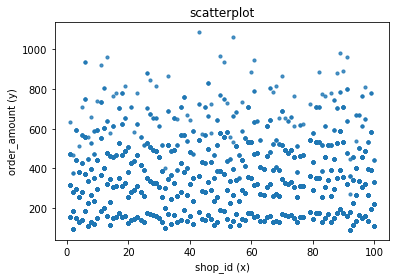

In [10]:
# visualized the new dataset, looks much even than before
plt.scatter(df2[['shop_id']], df2.order_amount, marker= 'o', s=10, alpha=0.8)
plt.title('scatterplot')
plt.xlabel('shop_id (x)')
plt.ylabel('order_amount (y)')
plt.show()

* Calculate new average order value(AOV) with new dataset.

In [11]:
print('Reasonable AOV should be: {:.2f}'.format(df2.order_amount.sum() / len(df2)))

Reasonable AOV should be: 300.16


* For the outliers, we can also check for their AOV individually.

In [12]:
print('Shop_id 42 AOV: {:.2f}'.format(df[(df.shop_id == 42)].order_amount.sum() / len(df[(df.shop_id == 42)])))

Shop_id 42 AOV: 235101.49


In [13]:
print('Shop_id 78 AOV: {:.2f}'.format(df[(df.shop_id == 78)].order_amount.sum() / len(df[(df.shop_id == 78)])))

Shop_id 78 AOV: 49213.04


## Therefore, to answer the question 1:
     a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

**OUTLIERS:** Checking all the data description and scatterplot, will find out that there should be outliers from a few shops, having much higher order amount than others, which would be the reason driving up the AOV.  

So, we should do the AOV separately, the reasonable AOV should exclude the shops that have a much higher order amount.
For the shop(s) having special situations, we should see how to deal with it once we have more detailed information.


     b. What metric would you report for this dataset?
I’d report the average order amount and average total items from each shop, with the numbers and figures to help explain. I’d also check the price for one pair of sneakers, the average and median values from these three.

     c. What is its value?
     
General and reasonable AOV(G) should be: $300.16. 

Higher item amount for each order AOV(H_Item):  $235101.49  (Shop_id 42) 

Higher price for each shop AOV(H_P): $49213.04 (Shop_id 78)